## TASK 1 : Titanic Survival Prediction

# Introduction

The Titanic problem challenges participants to use machine learning to predict which passengers on the Titanic survived the sinking. The dataset includes general and detail information such as age, gender, passenger class, fare, and cabin location for each Titanic passenger, as well as whether they survived or not. The goal is to create a machine learning model that can accurately predict whether a passenger survived based on these features. The competition provides a training dataset to build the model and a test dataset to evaluate its performance.

# Importing Libraries 

In [4]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [7]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print('Shape of Titanic Data set is :',titanic.shape)
print('Size of Titanic Data set is :',titanic.size)

Shape of Titanic Data set is : (891, 12)
Size of Titanic Data set is : 10692


In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object>

# Data Exploration

##  Visualization of the Data

### Cabin and Class Survival Distributions

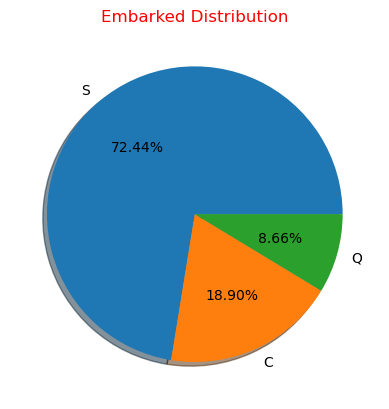

In [22]:
titanic['Embarked'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
plt.ylabel('')
plt.title('Embarked Distribution',color='Red',loc='center');


<Axes: xlabel='Survived', ylabel='count'>

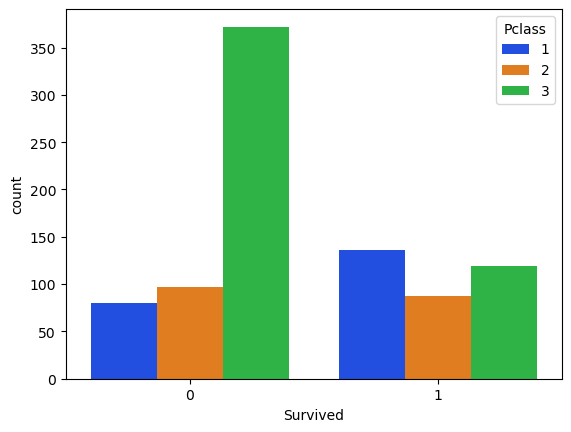

In [23]:
sns.countplot(x=titanic['Survived'],hue=titanic['Pclass'],palette='bright')

Text(0.5, 1.0, 'Embarked Distribution')

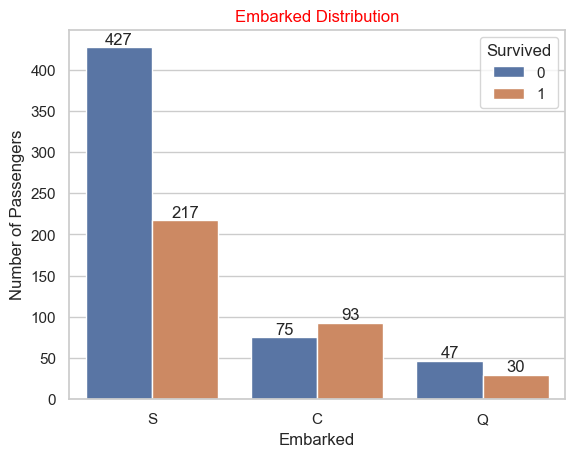

In [25]:
ax=sns.set(style='whitegrid')

ax=sns.countplot(data=titanic,x='Embarked',hue='Survived')
ax.set_ylabel('Number of Passengers')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Embarked Distribution',color ='red')

### Total Survival based on Gender

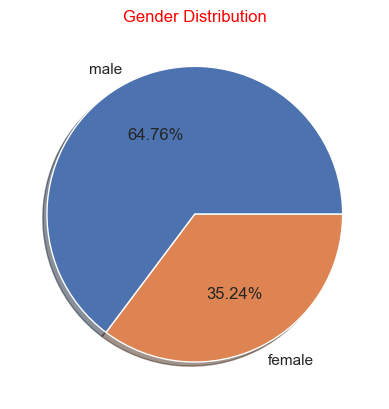

In [28]:
titanic['Sex'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
plt.ylabel('')
plt.title('Gender Distribution',color='Red',loc='center')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

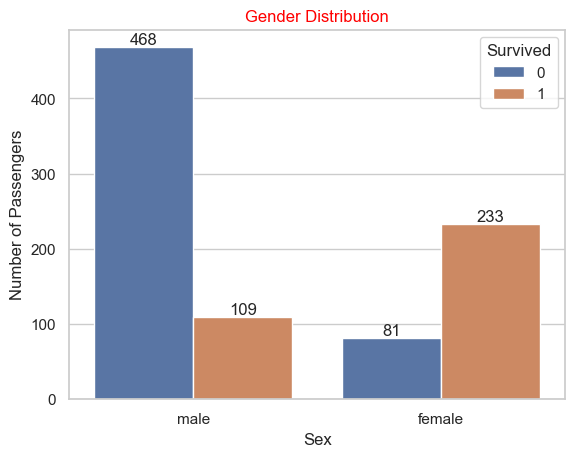

In [30]:
ax=sns.set(style='whitegrid')

ax=sns.countplot(data=titanic,x='Sex',hue='Survived')
ax.set_ylabel('Number of Passengers')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Gender Distribution',color ='red')

### Percentage of Passengers Survived

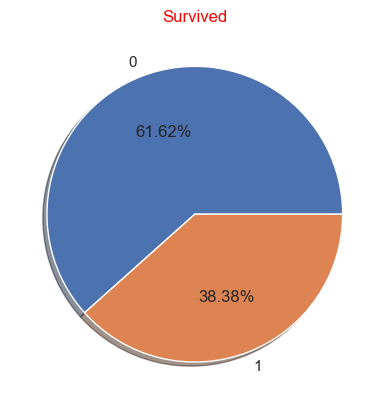

In [33]:
titanic['Survived'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
plt.title('Survived',color='Red',loc='center')
plt.ylabel('')
plt.show()

In [34]:
titanic.corr(numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


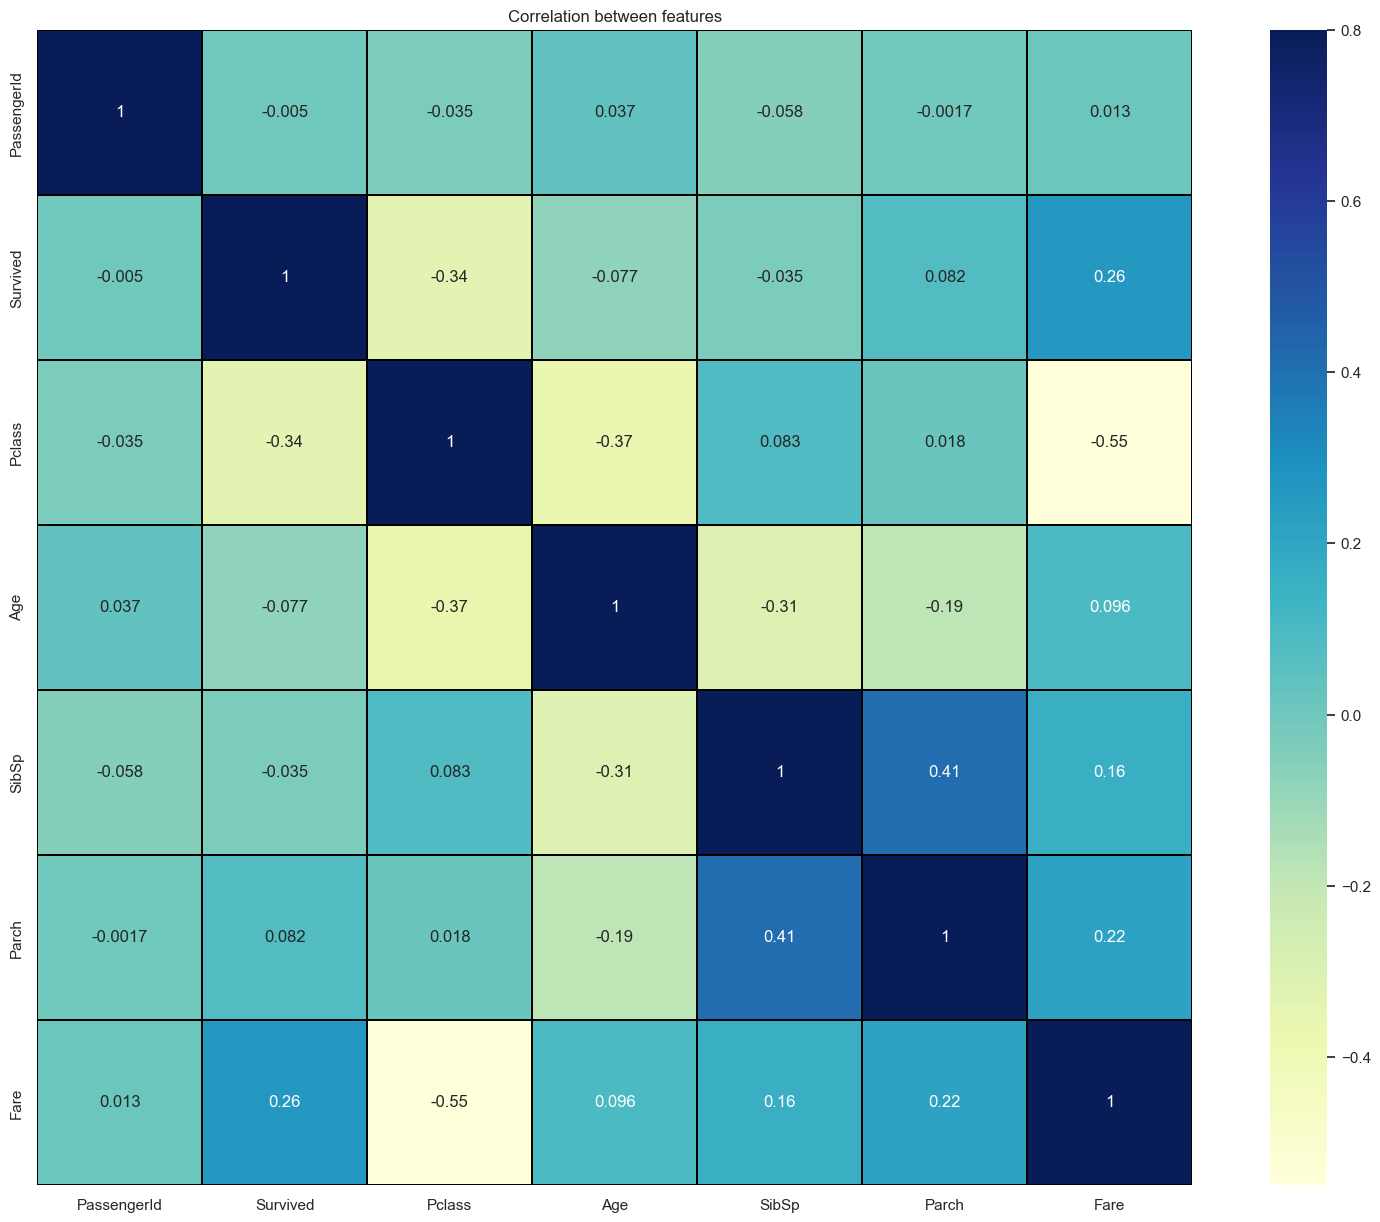

In [36]:
corr=titanic.corr(numeric_only=True)#["Survived"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [37]:
# correlation heatmap of higly correlated features with SalePrice

hig_corr = titanic.corr(numeric_only=True)
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features


Index(['Survived', 'Pclass', 'Fare'], dtype='object')

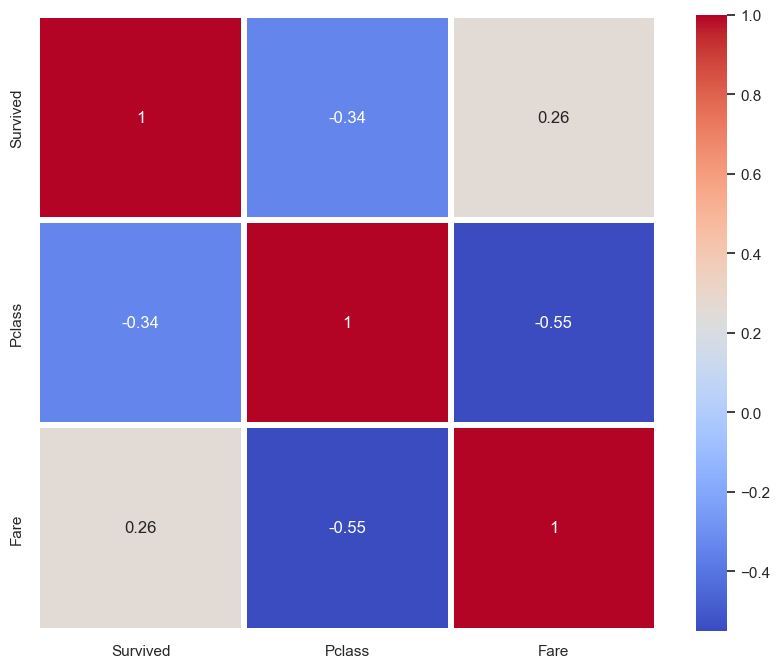

In [40]:
plt.figure(figsize=(10,8),dpi=100)
ax = sns.heatmap(titanic[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
plt.show()

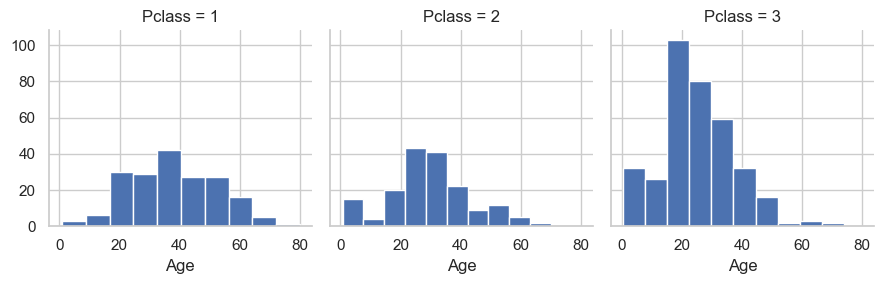

In [41]:
g = sns.FacetGrid(titanic,col='Pclass')
g = g.map(plt.hist,'Age')


# Feature Engineering


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [48]:
missing_value(titanic)

,Missing Number,Missing Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


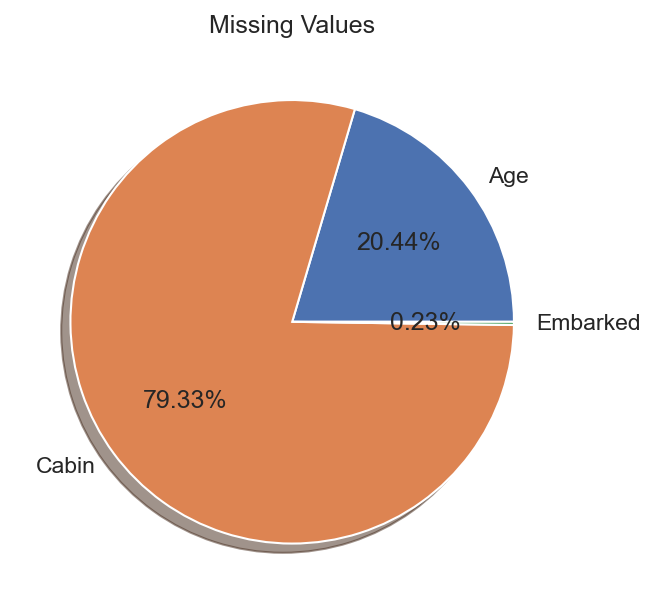

In [49]:
plt.figure(dpi=150)
missing_values = titanic.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values.plot.pie(autopct='%1.2f%%',shadow=True)
plt.title('Missing Values')
plt.show()


## Filling/Removing Missing values

In [56]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [58]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [60]:
titanic['Embarked']=titanic['Embarked'].ffill()

In [62]:
titanic = titanic.drop(['Cabin','Name','Ticket'],axis=1)

In [64]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## All the Missing values and unnecessary data got removed and Filled 

In [69]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True,dtype='float')

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


## Train Test Split

In [74]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

## Standardizing the data

In [78]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.360492,-1.584396,0.010681,-0.479698,-0.460682,-0.018600,0.728823,-0.31427,-1.611198
1,-1.632266,-1.584396,-0.119643,-0.479698,-0.460682,0.079245,0.728823,-0.31427,0.620656
2,-1.344650,-1.584396,-0.503148,-0.479698,0.810657,0.646624,0.728823,-0.31427,-1.611198
3,-1.686680,-0.381742,-1.193456,0.493365,-0.460682,-0.031329,-1.372075,-0.31427,-1.611198
4,-1.111449,0.820913,0.033758,-0.479698,-0.460682,-0.479818,0.728823,-0.31427,0.620656


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.676433,0.820913,-0.273045,0.493365,-0.460682,-0.315867,-1.372075,-0.31427,0.620656
1,-0.248601,0.820913,-0.809952,-0.479698,-0.460682,-0.485419,0.728823,-0.31427,0.620656
2,1.096196,0.820913,-0.733251,-0.479698,-0.460682,-0.467343,0.728823,-0.31427,0.620656
3,1.488753,0.820913,0.010681,-0.479698,-0.460682,0.506858,0.728823,-0.31427,0.620656
4,0.027354,-0.381742,0.493964,0.493365,2.081997,-0.078596,0.728823,-0.31427,0.620656


# Model Implementation
-Evaluating various models performance using their accuracy Score

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [89]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train,y_train)*100,2)
log_accuracy = round(accuracy_score(y_pred,y_test)*100,2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 80.06
Model Accuracy Score : 79.89


##  K Neighbours Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [98]:
y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 90.03
Model Accuracy Score  : 75.98


## Gaussian NB

In [101]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [105]:
y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 79.21
Model Accuracy Score  : 81.56


## Pereception

In [108]:
from sklearn.linear_model import Perceptron

In [110]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [112]:
y_pred = perceptron.predict(X_test)

perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)


Training Accuracy    : 73.74
Model Accuracy Score : 76.54


## Decision Tree Classifier 

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 73.74


## Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 81.01


# Comparing Models
Comparing different models to select the best fit for our data Set

In [129]:
models = pd.DataFrame({'Model': [
         'Logistic Regression','KNN','GaussianNB',  'Perceptron',
      'Decision Tree','Random Forest'],
    'Training Accuracy': [
        log_train, knn_train, gaussian_train, perceptron_train,
         decision_train, random_forest_train],
    'Model Accuracy Score': [
        log_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        decision_accuracy, random_forest_accuracy]
})

In [131]:
models

,Model,Training Accuracy,Model Accuracy Score
0,Logistic Regression,80.06,79.89
1,KNN,90.03,75.98
2,GaussianNB,79.21,81.56
3,Perceptron,73.74,76.54
4,Decision Tree,100.00,73.74
5,Random Forest,100.00,81.01


In [133]:
models.sort_values(by='Training Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Training Accuracy,Model Accuracy Score
4,Decision Tree,100.000000,73.740000
5,Random Forest,100.000000,81.010000
1,KNN,90.030000,75.980000
0,Logistic Regression,80.060000,79.890000
2,GaussianNB,79.210000,81.560000
3,Perceptron,73.740000,76.540000


In [135]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Training Accuracy,Model Accuracy Score
2,GaussianNB,79.210000,81.560000
5,Random Forest,100.000000,81.010000
0,Logistic Regression,80.060000,79.890000
3,Perceptron,73.740000,76.540000
1,KNN,90.030000,75.980000
4,Decision Tree,100.000000,73.740000


# Fitting the Appropriate Model and making our prediction

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
y = titanic['Survived']
features = ['Pclass', 'SibSp', 'Parch']

X = pd.get_dummies(titanic[features])
X_test = pd.get_dummies(titanic[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': titanic.PassengerId, 'Survived': predictions})

# Saving the prediction data into a csv file
output.to_csv('Prediction_final.csv', index=False)


In [145]:
print('Thank you for taking the time to read through my first Task of my internship of Machine Learning for Encriptix.')

Thank you for taking the time to read through my first Task of my internship of Machine Learning for Encriptix.
